# EDA (Exploratory Data Analysis)

#### Importing necessary libraries

In [71]:
#Core Libraries
import pandas as pd # Data manipulation
import numpy as np # Numerical operations

#Data Visualization Libraries
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical visualization
import plotly.express as px  # Interactive plots
import missingno as msno  # Visualizing missing values

#Data Quality & Preprocessing Libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Feature scaling
from sklearn.impute import SimpleImputer, KNNImputer  # Handling missing values
from scipy.stats import skew, kurtosis, zscore  # Statistical insights
from sklearn.feature_selection import VarianceThreshold  # Low-variance filter

#Outlier Detection Libraries
from scipy.stats import iqr  # Inter-quartile Range (IQR) for outliers
from sklearn.ensemble import IsolationForest  # Anomaly detection
from sklearn.covariance import EllipticEnvelope  # Multivariate outlier detection
from sklearn.neighbors import LocalOutlierFactor  # LOF outlier detection

#Feature Selection & Dimensionality Reduction Libraries
from sklearn.decomposition import PCA  # Principal Component Analysis
from sklearn.feature_selection import RFE  # Recursive Feature Elimination
from sklearn.linear_model import LassoCV  # Lasso regression for feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Multicollinearity check

#Correlation & Hypothesis Testing
import scipy.stats as stats  # Statistical tests
from scipy.stats import pearsonr, spearmanr, chi2_contingency  # Correlation analysis

#Normalizing X and Y
from sklearn.preprocessing import MinMaxScaler


import os
import sys


#### Data Loading & Overview

In [72]:
# Load the dataset
df = pd.read_csv("MLE-Assignment.csv")  # Replace with the actual path

# Display the first few rows
display(df.head())

# Display the last few rows
display(df.tail())

# Check the number of rows and columns
print(f"Dataset shape: {df.shape}")  # (rows, columns)

# Identify the data types of each column
df.info()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Verify if 'hsi_id' is a unique identifier
if "hsi_id" in df.columns:
    unique_hsi_id = df["hsi_id"].nunique()
    total_rows = df.shape[0]
    print(f"Unique 'hsi_id' count: {unique_hsi_id} out of {total_rows} rows")
    if unique_hsi_id == total_rows:
        print(f"'hsi_id' is a unique identifier.")
    else:
        print(f"'hsi_id' is not unique.")
        
        # Identify duplicate 'hsi_id' values
        duplicate_hsi_ids = df[df.duplicated("hsi_id", keep=False)]["hsi_id"].unique()
        print(f"Duplicate 'hsi_id' values: {duplicate_hsi_ids}")
        
        # Display rows where 'hsi_id' is not unique
        non_unique_rows = df[df["hsi_id"].isin(duplicate_hsi_ids)]
        print("Rows where 'hsi_id' is not unique:")
        display(non_unique_rows)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0
499,imagoai_corn_499,0.460840,0.457656,0.434632,0.412675,0.418638,0.408338,0.403807,0.388811,0.382484,...,0.717509,0.726149,0.728631,0.725808,0.716943,0.718320,0.707611,0.729484,0.718706,1400.0


Dataset shape: (500, 450)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
Number of duplicate rows: 0
Unique 'hsi_id' count: 497 out of 500 rows
'hsi_id' is not unique.
Duplicate 'hsi_id' values: ['imagoai_corn_395' 'imagoai_corn_385' 'imagoai_corn_443']
Rows where 'hsi_id' is not unique:


,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
54,imagoai_corn_395,0.496301,0.479573,0.480461,0.477477,0.453247,0.476724,0.466602,0.443715,0.470380,...,0.814446,0.813131,0.812312,0.798008,0.817616,0.777920,0.804107,0.802259,0.789933,0.0
308,imagoai_corn_385,0.393269,0.389350,0.357651,0.381475,0.348101,0.370259,0.345830,0.343851,0.349881,...,0.791989,0.781095,0.784565,0.785925,0.792714,0.796940,0.805238,0.797527,0.781207,300.0
385,imagoai_corn_385,0.385710,0.404904,0.345857,0.374159,0.363479,0.349988,0.354865,0.340398,0.369850,...,0.802557,0.799114,0.783101,0.776276,0.791921,0.797829,0.800767,0.785109,0.796771,300.0
395,imagoai_corn_395,0.493367,0.504286,0.485930,0.471946,0.478705,0.473456,0.466760,0.470290,0.447366,...,0.791491,0.790374,0.814201,0.807443,0.811985,0.783479,0.797435,0.788128,0.814911,0.0
420,imagoai_corn_443,0.465689,0.461339,0.460432,0.432276,0.440023,0.454322,0.436480,0.440962,0.417962,...,0.769712,0.770580,0.761353,0.759335,0.766865,0.757690,0.789156,0.767399,0.772126,0.0
443,imagoai_corn_443,0.463710,0.473496,0.467616,0.458209,0.445803,0.429513,0.435986,0.426006,0.436493,...,0.767774,0.755153,0.757210,0.758560,0.770065,0.765849,0.777622,0.754967,0.751124,0.0


#### Missing Values Analysis

In [73]:
# Dropping the 'hsi_id' column
df.drop("hsi_id", axis=1, inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values

if missing_values.sum() == 0:
    print(f"No missing values in the dataset.")

No missing values in the dataset.


### Target Variable Analysis (vomitoxin_ppb which is also known as DON)

In [74]:
print(df["vomitoxin_ppb"].describe())

count       500.000000
mean       3410.006000
std       13095.803483
min           0.000000
25%         137.500000
50%         500.000000
75%        1700.000000
max      131000.000000
Name: vomitoxin_ppb, dtype: float64


#### Visualization of Target Variable

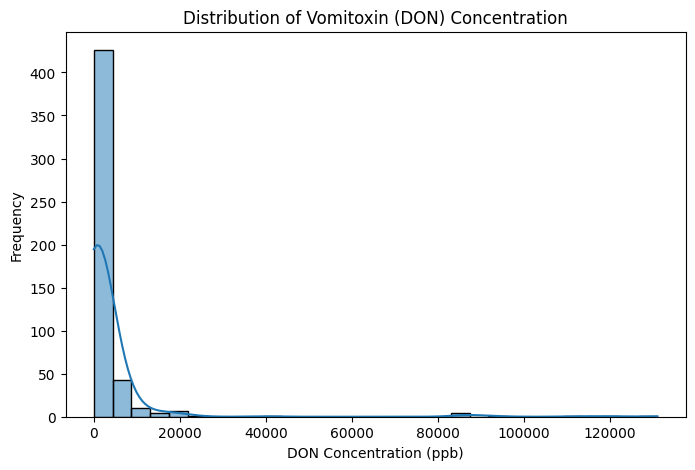

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(df["vomitoxin_ppb"], bins=30, kde=True)
plt.title("Distribution of Vomitoxin (DON) Concentration")
plt.xlabel("DON Concentration (ppb)")
plt.ylabel("Frequency")
plt.show()

#### Key Analysis of vomitoxin_ppb:

Highly Skewed Distribution

    The histogram shows a long right tail indicating positive skewness.
    The mean (3410 ppb) is much higher than the median (500 ppb) which confirms this skew.
    Most of the data is concentrated in lower values but a few extreme values (outliers) stretch the distribution.

Extreme Outliers Present

    The max value (131,000 ppb) is drastically higher than the 75th percentile (1,700 ppb).
    The standard deviation (13,095 ppb) is very large showing high variance.

Potential Log Transformation Candidate

    Since the data is highly skewed, using log transformation (e.g., np.log1p(vomitoxin_ppb)) can help normalize it for better modeling.
    This will make regression models more robust by reducing the influence of extreme values.

Outlier Handling

    We can consider detecting and handling extreme outliers using methods like IQR (Interquartile Range) filtering or Winsorization.
    

#### Outliers Detection in Target Variable

In [76]:
Q1 = df['vomitoxin_ppb'].quantile(0.25)
Q3 = df['vomitoxin_ppb'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['vomitoxin_ppb'] < lower_bound) | (df['vomitoxin_ppb'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")



Number of Outliers: 80


According to Aguinis et al. (2013) in their widely cited research "Best-Practice Recommendations for Defining, Identifying, and Handling Outliers" (DOI: 10.1177/1094428112470848), removing outliers arbitrarily can lead to information loss and biased models. Instead, they recommend transformations or robust modeling techniques to retain the integrity of the dataset while minimizing distortion. Similarly, the study "Assessment of Deoxynivalenol in Wheat, Corn and Its Products and Human Exposure in Egypt" (IJERPH, 2021) emphasizes that DON contamination in corn exhibits high variability, making extreme values scientifically significant rather than errors. Based on these insights, instead of removing outliers, we will apply log transformation to normalize the skewed distribution while preserving extreme values for accurate modeling

#### Code Implementation based on Research Findings

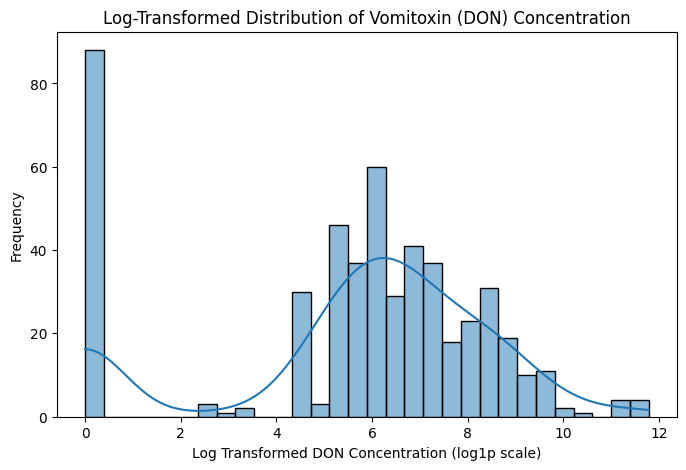

In [77]:
# Apply log transformation to normalize DON concentration values
df['log_vomitoxin'] = np.log1p(df['vomitoxin_ppb'])  # log(1 + x) prevents issues with zeros

# Plot the new distribution after transformation
plt.figure(figsize=(8, 5))
sns.histplot(df['log_vomitoxin'], kde=True, bins=30)
plt.title("Log-Transformed Distribution of Vomitoxin (DON) Concentration")
plt.xlabel("Log Transformed DON Concentration (log1p scale)")
plt.ylabel("Frequency")
plt.show()


#### Correlation Analysis

Correlation Matrix:
            1         2         3         4         5         6         7  \
1    1.000000  0.947421  0.942850  0.940810  0.941707  0.932305  0.927004   
2    0.947421  1.000000  0.944810  0.944345  0.942053  0.937859  0.932574   
3    0.942850  0.944810  1.000000  0.946280  0.945929  0.935430  0.937877   
4    0.940810  0.944345  0.946280  1.000000  0.946352  0.945448  0.938435   
5    0.941707  0.942053  0.945929  0.946352  1.000000  0.944417  0.946972   
..        ...       ...       ...       ...       ...       ...       ...   
443  0.686211  0.696341  0.707400  0.695040  0.703088  0.709468  0.728273   
444  0.671872  0.677799  0.688762  0.671909  0.679614  0.686889  0.707347   
445  0.676445  0.681920  0.695613  0.677817  0.688736  0.698695  0.714408   
446  0.686367  0.692196  0.701369  0.685099  0.691850  0.703012  0.718943   
447  0.682848  0.695569  0.706403  0.689308  0.696759  0.705035  0.721604   

            8         9        10  ...       438       

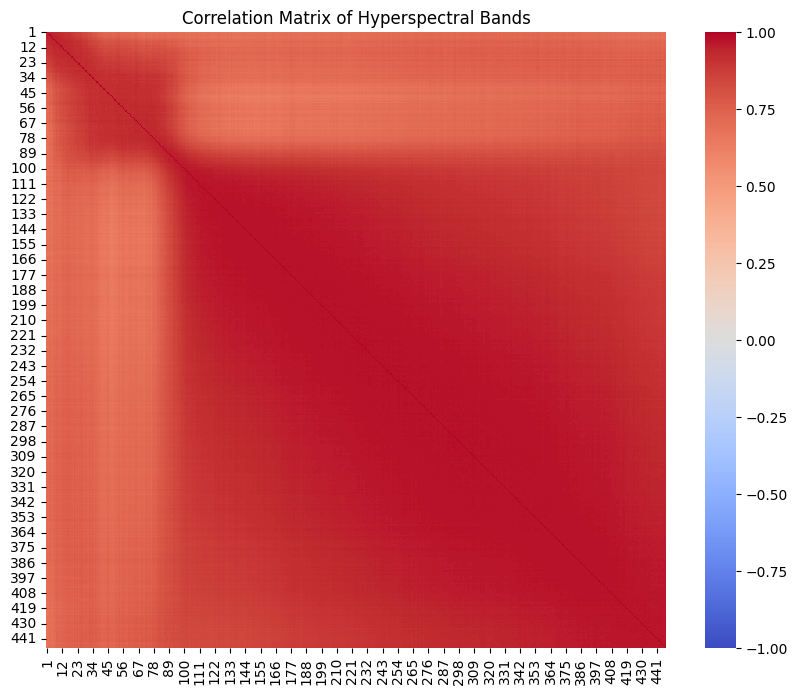

Correlation matrix saved at: outputs\correlation_matrix.xlsx


In [78]:
# Define output directory and file path
OUTPUT_DIR = "outputs"
FILE_PATH = os.path.join(OUTPUT_DIR, "correlation_matrix.xlsx")

def compute_correlation_matrix(dataframe):
    """
    Compute the correlation matrix for the given dataframe.
    Returns a pandas DataFrame.
    """
    return dataframe.iloc[:, 1:448].corr()

def plot_correlation_heatmap(corr_matrix):
    """
    Plots a heatmap of the correlation matrix.
    """
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Matrix of Hyperspectral Bands")
    plt.show()

def save_correlation_matrix(corr_matrix, file_path):
    """
    Saves the correlation matrix as an Excel file.
    """
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    corr_matrix.to_excel(file_path)
    print(f"Correlation matrix saved at: {file_path}")


corr_matrix = compute_correlation_matrix(df)

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot the heatmap
plot_correlation_heatmap(corr_matrix)

# Save the correlation matrix to Excel
save_correlation_matrix(corr_matrix, FILE_PATH)

#### Separating Y and X Variables

In [79]:
Y = df['log_vomitoxin']
X = df.iloc[:, 1:447]  # Selecting all columns except 'log_vomitoxin'

#### Normalize X and Y

In [80]:
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Fit and transform X and Y
X = scaler_X.fit_transform(X)

Y = scaler_Y.fit_transform(Y.values.reshape(-1, 1))

### Analysis of Features (Spectral Values at Different Wavelengths)

In [89]:
# Descriptive statistics for numerical columns in DataFrame X
X = pd.DataFrame(X)
descriptive_stats = X.describe()
print(descriptive_stats)

              0           1           2           3           4           5    \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.619298    0.611948    0.573639    0.568235    0.584254    0.592892   
std      0.193830    0.187012    0.183436    0.210984    0.208105    0.184626   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.464087    0.461663    0.425943    0.396827    0.420130    0.442595   
50%      0.627344    0.613585    0.569465    0.559337    0.581650    0.591129   
75%      0.781366    0.772728    0.728229    0.755228    0.769275    0.752592   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              6           7           8           9    ...         436  \
count  500.000000  500.000000  500.000000  500.000000  ...  500.000000   
mean     0.571678    0.592570    0.608698    0.564848  ...    0.472269   
std      0.206309    0.186783    0.206257    0.2

##### Duplicates Checking

In [90]:
# Check for duplicate rows
duplicates = X.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


##### Check Inconsistent Data Types

In [91]:
#check if dtype of all columns is same
if X.dtypes.nunique() == 1:
    print(f"All columns have the same data type which is {X.dtypes.iloc[0]}")
else:
    print("Columns have different data types.")


All columns have the same data type which is float64


#### Checking outliers

In [92]:
# Detect outliers using Z-scores
from scipy.stats import zscore
z_scores = X.apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print(outliers[outliers > 0])

0      1
1      1
2      1
5      1
7      1
      ..
441    9
442    6
443    9
444    7
445    4
Length: 434, dtype: int64


#### Plot Distribution of Spectral Lines First 20 and Last 20

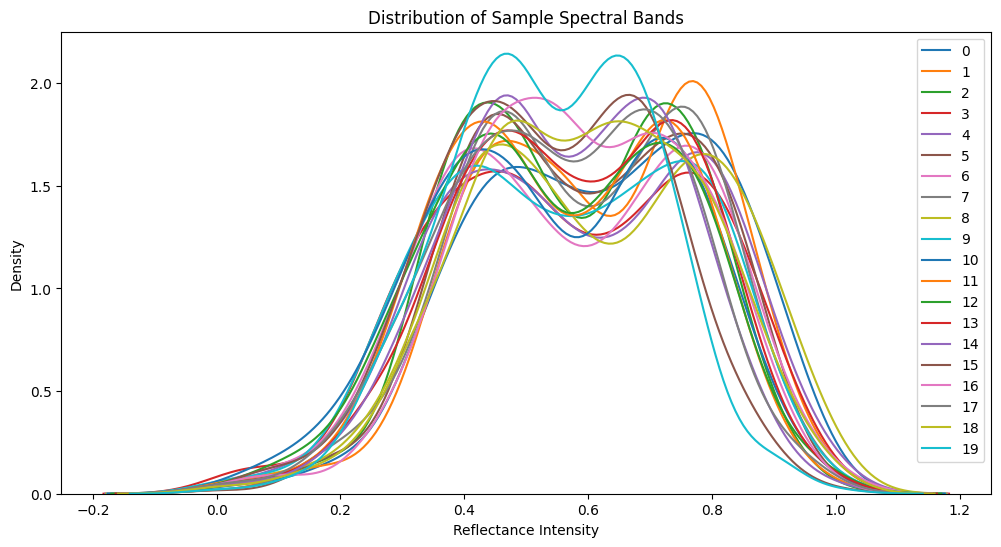

In [93]:
# Select a subset of spectral bands
sample_features = X.columns[:20]

# Plot distributions
plt.figure(figsize=(12, 6))
for feature in sample_features:
    sns.kdeplot(X[feature], label=feature)

plt.xlabel("Reflectance Intensity")
plt.ylabel("Density")
plt.title("Distribution of Sample Spectral Bands")
plt.legend()
plt.show()

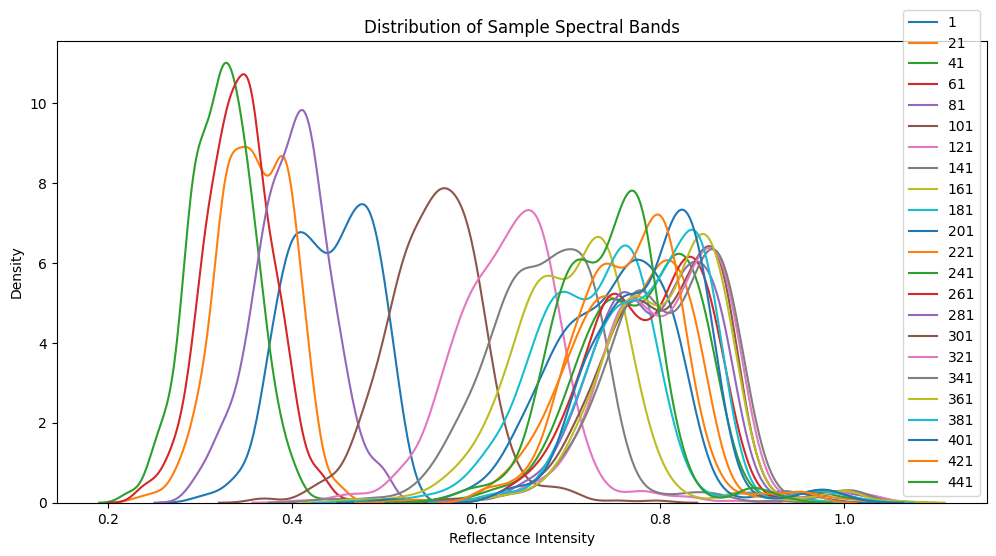

In [16]:
# Select a subset of spectral bands 
sample_features = X.columns[::20]

# Plot distributions
plt.figure(figsize=(12, 6))
for feature in sample_features:
    sns.kdeplot(X[feature], label=feature)

plt.xlabel("Reflectance Intensity")
plt.ylabel("Density")
plt.title("Distribution of Sample Spectral Bands")
plt.legend()
plt.show()

#### Line Plots for Average Reflectance Over Wavelengths

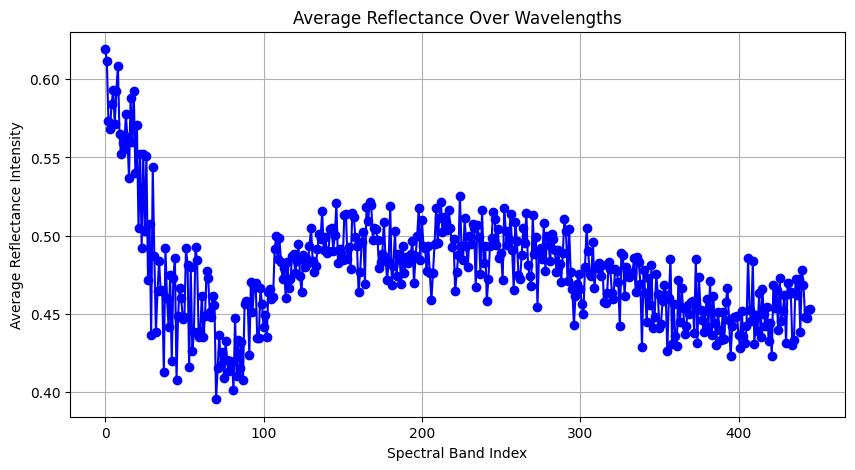

In [95]:
avg_reflectance = X.mean(axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(avg_reflectance)), avg_reflectance, marker='o', linestyle='-', color='b')
plt.xlabel("Spectral Band Index")
plt.ylabel("Average Reflectance Intensity")
plt.title("Average Reflectance Over Wavelengths")
plt.grid()
plt.show()

#### Pair-Plot for Sample Comparisons

C:\Users\saket\AppData\Local\Temp\ipykernel_5072\782346539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_features['Target'] = Y  # Include target variable


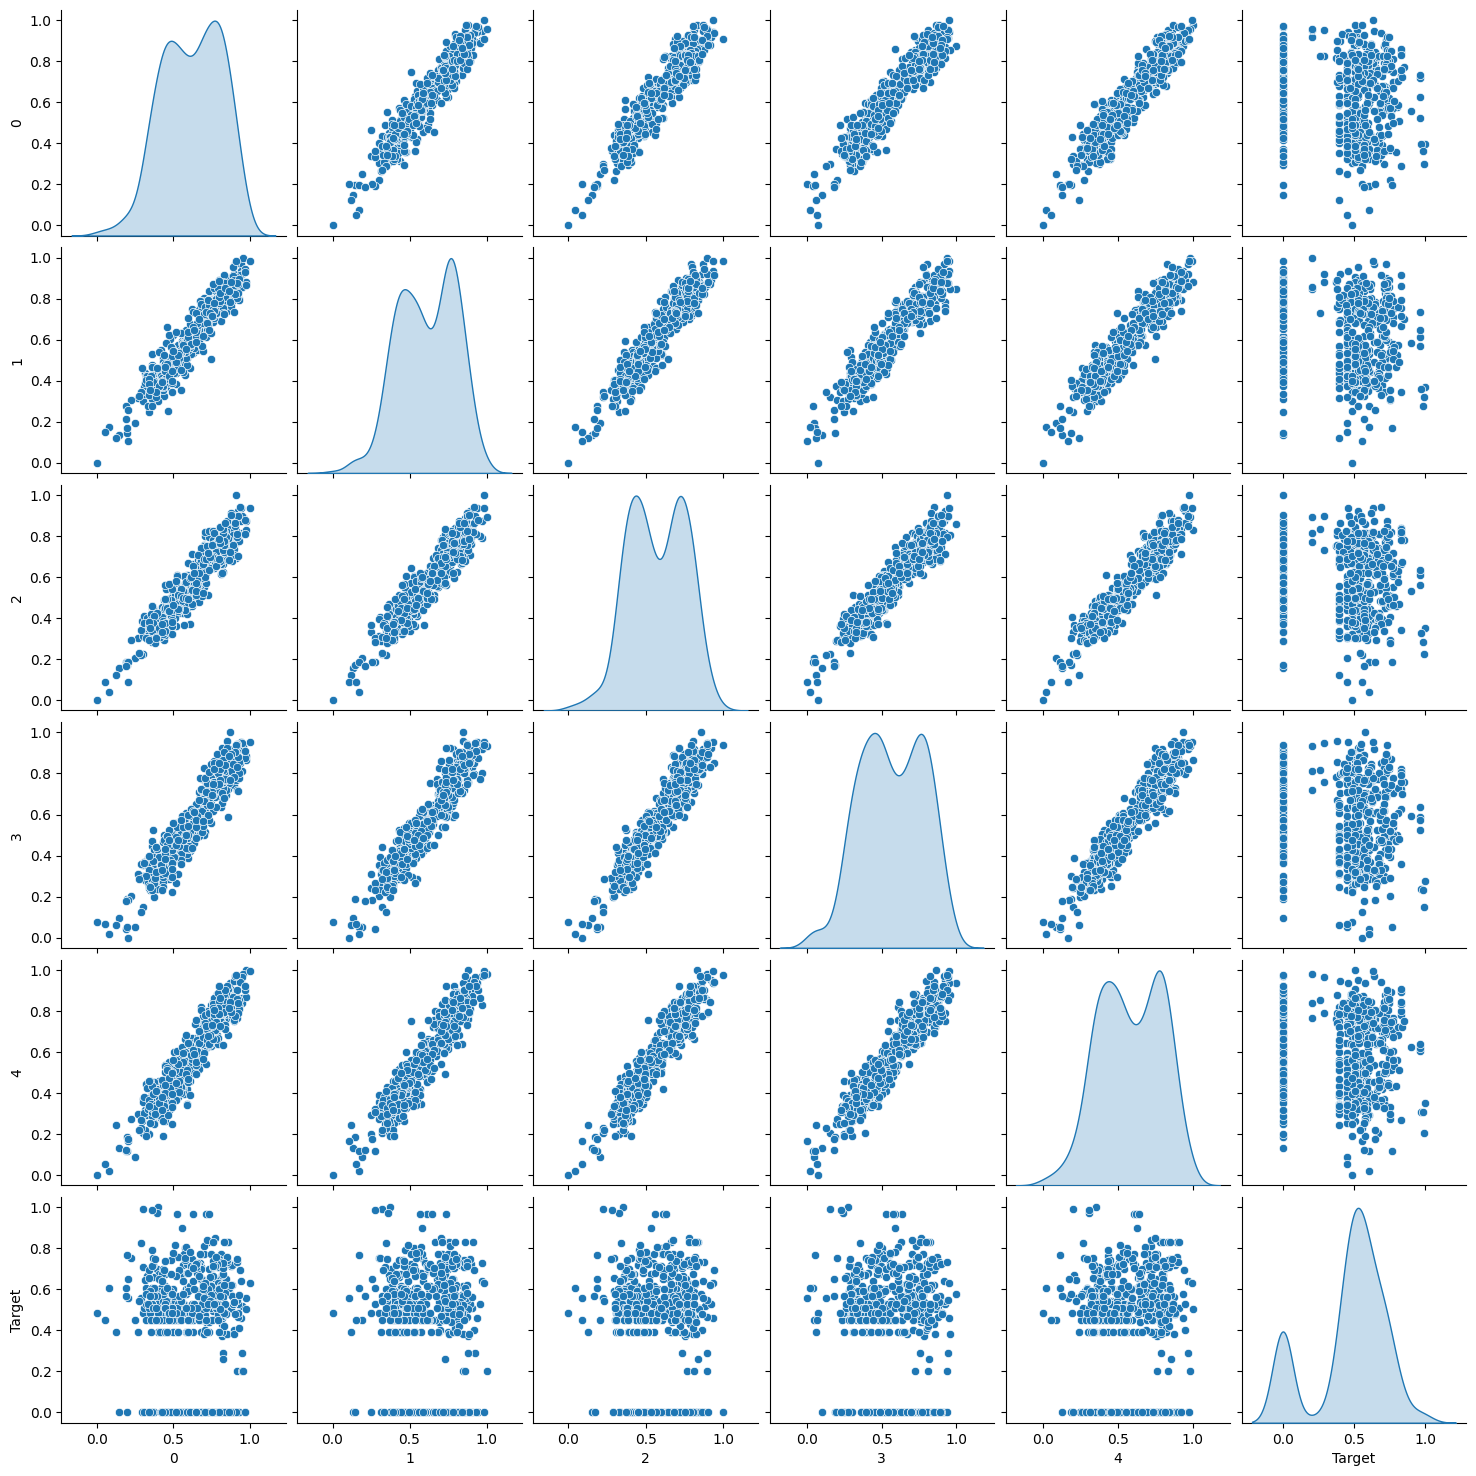

In [96]:
sample_features = X.iloc[:, :5]  # Pick first 5 bands for visualization
sample_features['Target'] = Y  # Include target variable

sns.pairplot(sample_features, diag_kind='kde')
plt.show()


#### Automate Checks for Sensor Drift or Data Inconsistencies

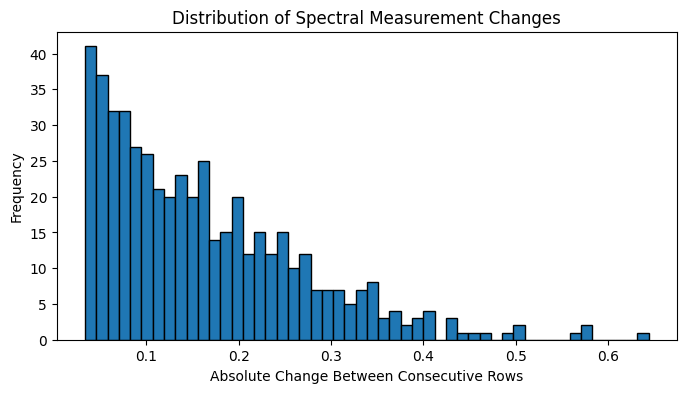

Number of potential measurement anomalies detected: 7


In [97]:
# Compute the difference between consecutive rows to detect sudden jumps
diff = X.diff().abs().mean(axis=1)

# Plot histogram of differences
plt.figure(figsize=(8, 4))
plt.hist(diff, bins=50, edgecolor='black')
plt.xlabel("Absolute Change Between Consecutive Rows")
plt.ylabel("Frequency")
plt.title("Distribution of Spectral Measurement Changes")
plt.show()

# Identify potential anomalies
threshold = diff.mean() + 3 * diff.std()
anomalous_points = df[diff > threshold]

print(f"Number of potential measurement anomalies detected: {len(anomalous_points)}")


#### Adding Spectral Ratio (Spectral Index)

In [98]:
# simple spectral ratio
X['Spectral_Ratio'] = X.iloc[:, 10] / (X.iloc[:, 20] + 1e-6)  # Avoid division by zero



In [21]:
# Save X and Y to CSV files
X.to_csv('X_data.csv', index=False)
Y.to_csv('Y_data.csv', index=False)